In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pd.read_csv("iris.csv")

X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = data['species'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Data ready:", X_scaled.shape)


Data ready: (150, 4)


Explained variance ratio: [0.72770452 0.23030523]
Total variance captured: 0.9580097536148199


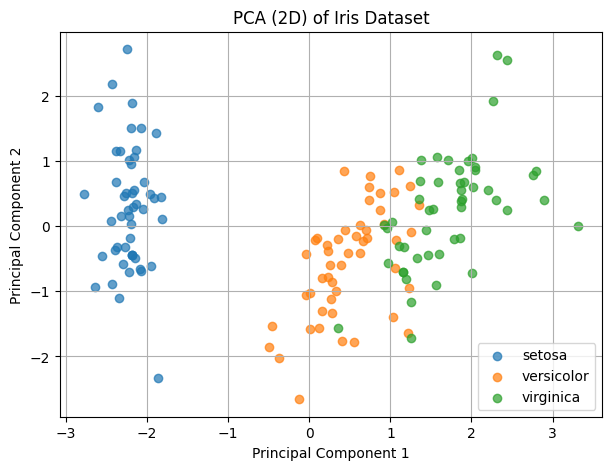

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variance explained
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))

# Plot
plt.figure(figsize=(7,5))
for label in range(3):
    plt.scatter(X_pca[y_encoded==label,0],
                X_pca[y_encoded==label,1],
                label=encoder.classes_[label], alpha=0.7)
plt.title("PCA (2D) of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


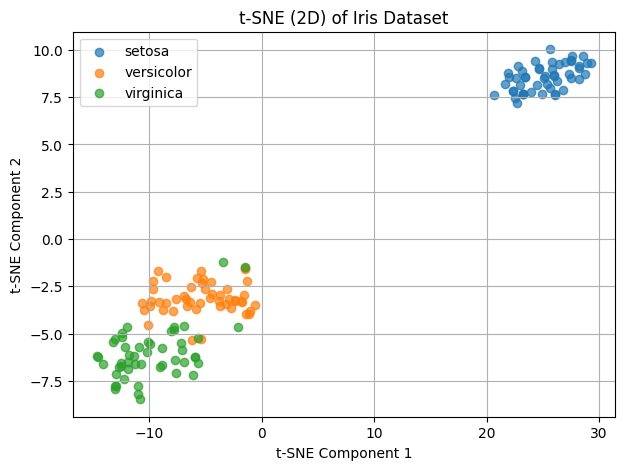

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE (set random_state for reproducibility)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE
plt.figure(figsize=(7,5))
for label in range(3):
    plt.scatter(X_tsne[y_encoded==label,0],
                X_tsne[y_encoded==label,1],
                label=encoder.classes_[label], alpha=0.7)
plt.title("t-SNE (2D) of Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("PCA Total Variance Captured:", round(sum(pca.explained_variance_ratio_), 3))
print("Observation:")
print("- PCA preserves global variance and is linear.")
print("- t-SNE focuses on local structure and can separate clusters better.")


PCA Total Variance Captured: 0.958
Observation:
- PCA preserves global variance and is linear.
- t-SNE focuses on local structure and can separate clusters better.
